# Data Glacier - Week 09

### Import Libraries

In [1]:
# Pandas is necessary for array manipulation and calculation
import pandas as pd
from pandas import DataFrame

# Matplotlib library to create visualizations
import matplotlib.pyplot as plt

# Missingno used for missing data visualization
import missingno as msno

# NumPy necessary for statistical calculations
import numpy as np
np.set_printoptions(threshold=np.inf)

# Change theme of graphs
plt.style.use('fivethirtyeight')

# Export images from Jupyter to PDF
%matplotlib inline

# Import Seaborn to graph distplots and boxplots
import seaborn as sns

from sklearn.linear_model import LinearRegression 

### Import Datasets

In [2]:
# Kaggle Test Dataset
test_df = pd.read_csv('train_E6oV3lV.csv')

# Kaggle Train Dataset
train_df = pd.read_csv('test_tweets_anuFYb8.csv')

# Data Cleaning

### View Headers

In [3]:
test_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


### Verify Data types

In [5]:
test_df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [6]:
train_df.dtypes

id        int64
tweet    object
dtype: object

### Check for null values

In [7]:
test_df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
train_df.isnull().sum()

id       0
tweet    0
dtype: int64

### Show Shape

In [9]:
test_df.shape

(31962, 3)

In [10]:
train_df.shape

(17197, 2)

### Remove Duplicates

In [11]:
test_df = test_df.drop_duplicates()

In [12]:
train_df = train_df.drop_duplicates()

### Check for Missing Data

<AxesSubplot:>

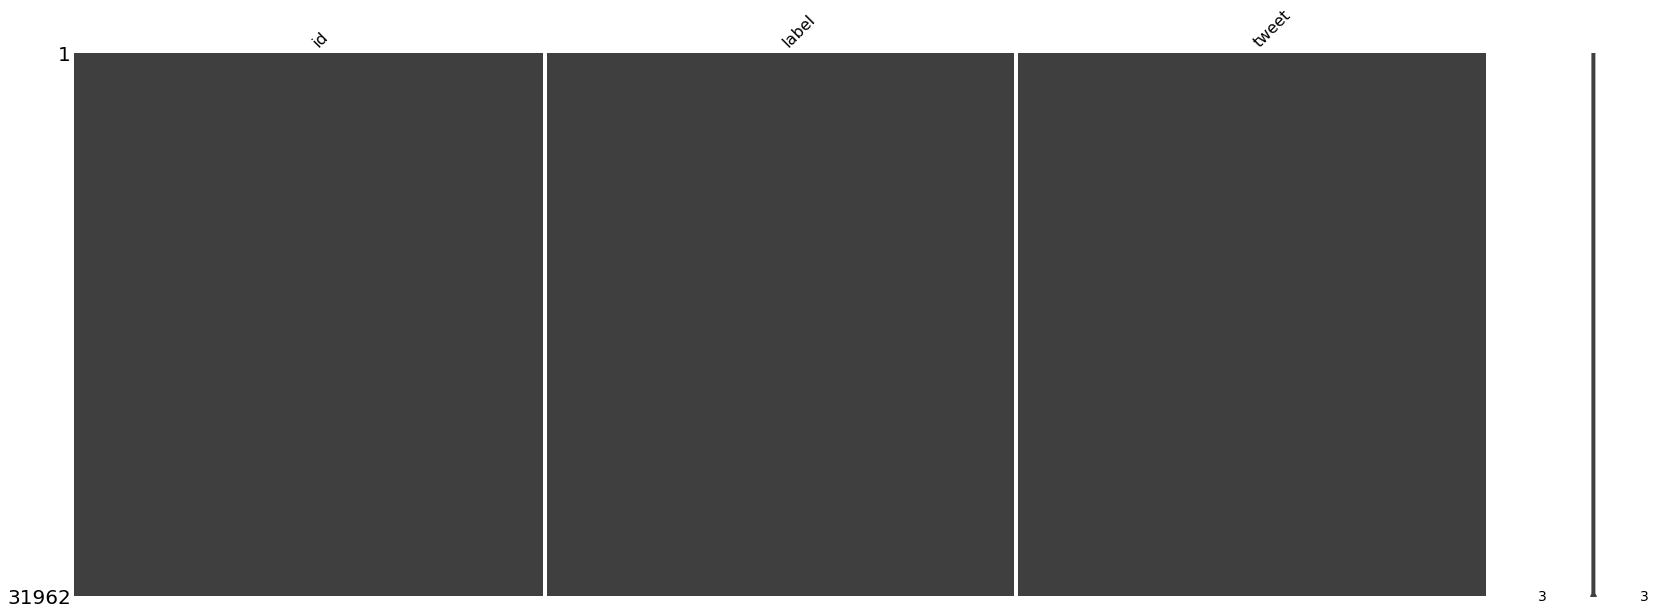

In [13]:
msno.matrix(test_df)

<AxesSubplot:>

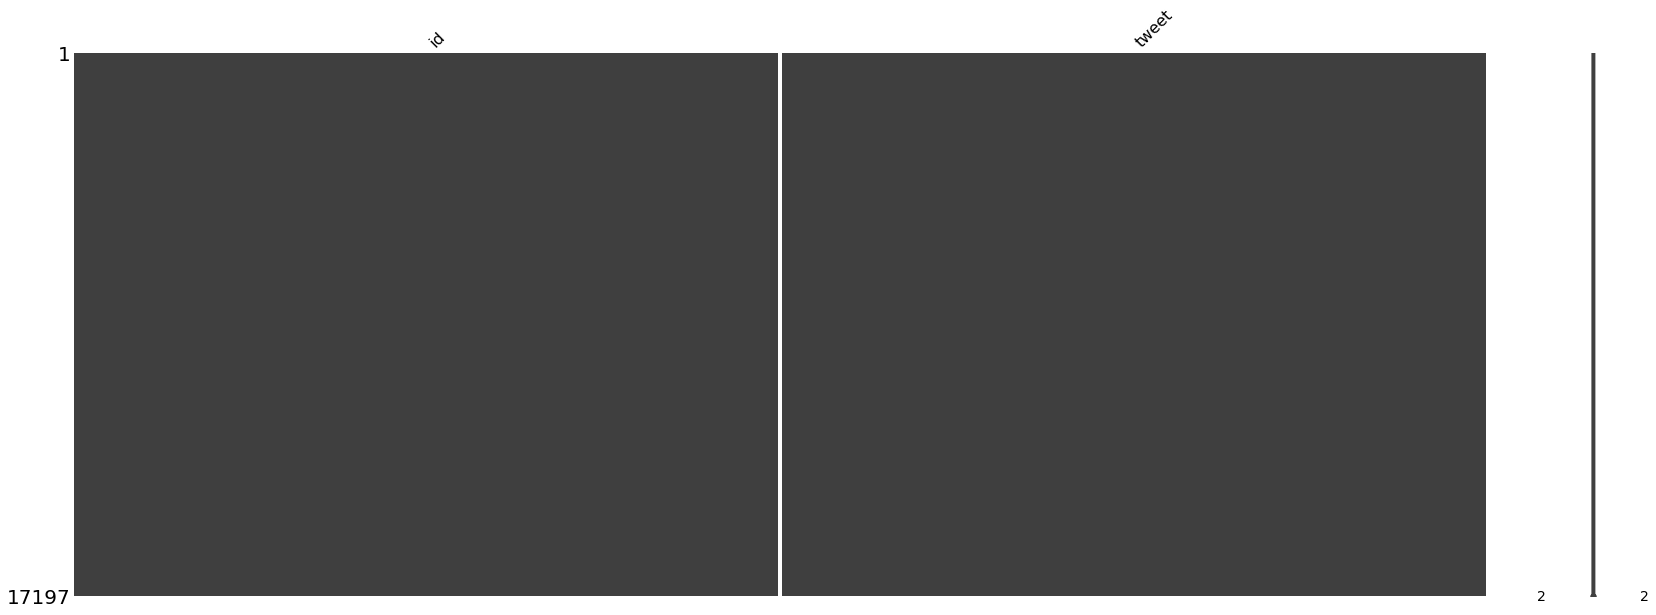

In [14]:
msno.matrix(train_df)

<AxesSubplot:>

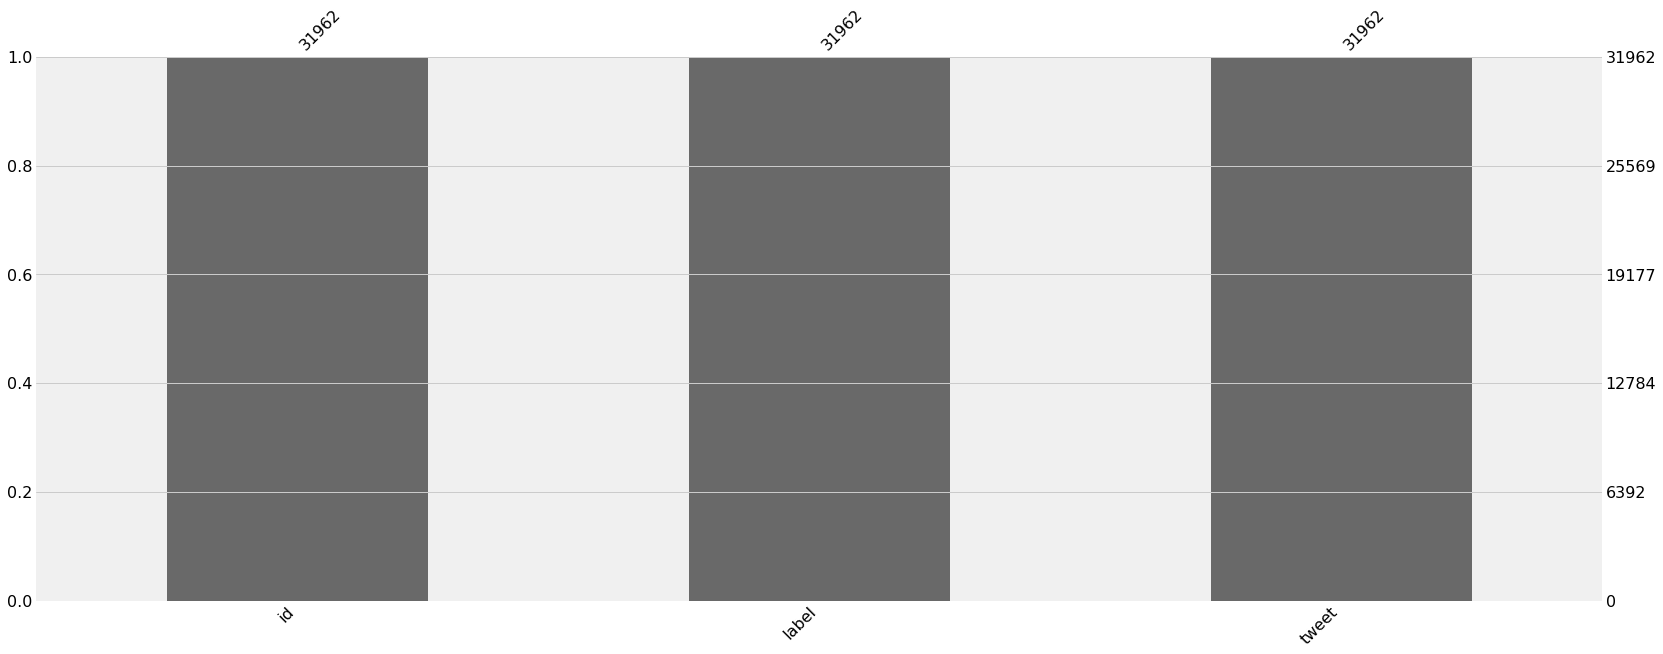

In [15]:
msno.bar(test_df)

<AxesSubplot:>

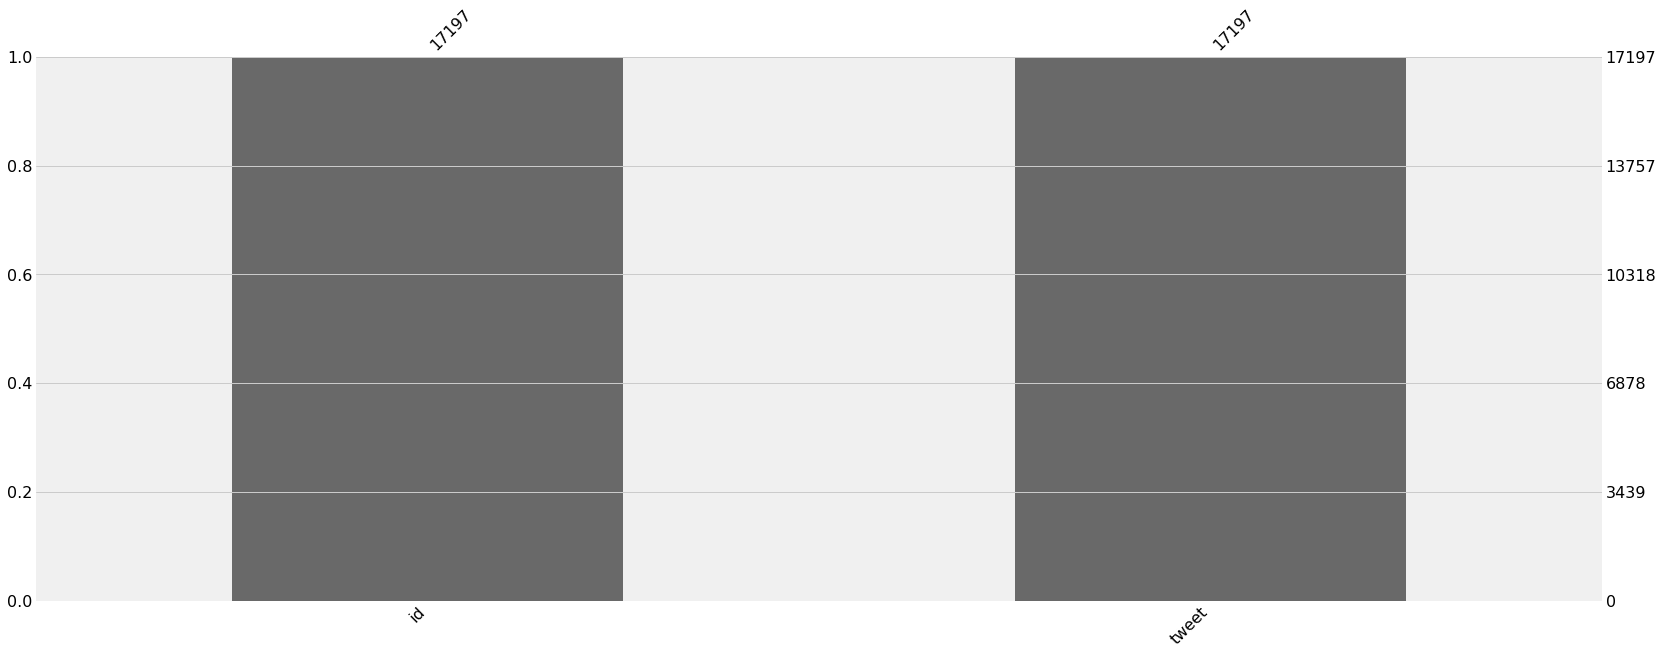

In [16]:
msno.bar(train_df)

### Remove Punctuation

In [17]:
# Import string library and define variable containing string characters
import string
punch = string.punctuation

In [18]:
# Function to remove punctuation from specified text
def remove_punctuation(text):
    no_punct=[words for words in text if words not in punch]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [19]:
test_df['tweet'] = test_df['tweet'].apply(lambda x: remove_punctuation(x))
test_df.head()

,id,label,tweet
0,1,0,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation


In [20]:
train_df['tweet'] = train_df['tweet'].apply(lambda x: remove_punctuation(x))
train_df.head()

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,user white supremacists want everyone to see ...
2,31965,safe ways to heal your acne altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew el...


### Tokenization

In [21]:
import re

In [22]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split

In [23]:
test_df['tweet']=test_df['tweet'].apply(lambda x: tokenize(x.lower()))
test_df.head()

,id,label,tweet
0,1,0,"[, user, when, a, father, is, dysfunctional, a..."
1,2,0,"[user, user, thanks, for, lyft, credit, i, can..."
2,3,0,"[, bihday, your, majesty]"
3,4,0,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,"[, factsguide, society, now, motivation]"


In [24]:
train_df['tweet']=train_df['tweet'].apply(lambda x: tokenize(x.lower()))
train_df.head()

,id,tweet
0,31963,"[studiolife, aislife, requires, passion, dedic..."
1,31964,"[, user, white, supremacists, want, everyone, ..."
2,31965,"[safe, ways, to, heal, your, acne, altwaystohe..."
3,31966,"[is, the, hp, and, the, cursed, child, book, u..."
4,31967,"[, 3rd, bihday, to, my, amazing, hilarious, ne..."


### Stop Words

In [25]:
import nltk

# Download stop words (run once)
# nltk.download('stopwords')

# Download lemmatizer list (run once)
# nltk.download('wordnet')

In [26]:
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:11])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


In [27]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text

In [28]:
test_df['tweet'] = test_df['tweet'].apply(lambda x: remove_stopwords(x))
test_df.head()

,id,label,tweet
0,1,0,"[, user, father, dysfunctional, selfish, drags..."
1,2,0,"[user, user, thanks, lyft, credit, cant, use, ..."
2,3,0,"[, bihday, majesty]"
3,4,0,"[model, love, u, take, u, time, urð, ð, ð, ð, ..."
4,5,0,"[, factsguide, society, motivation]"


In [29]:
train_df['tweet'] = train_df['tweet'].apply(lambda x: remove_stopwords(x))
train_df.head()

,id,tweet
0,31963,"[studiolife, aislife, requires, passion, dedic..."
1,31964,"[, user, white, supremacists, want, everyone, ..."
2,31965,"[safe, ways, heal, acne, altwaystoheal, health..."
3,31966,"[hp, cursed, child, book, reservations, alread..."
4,31967,"[, 3rd, bihday, amazing, hilarious, nephew, el..."


### Lemmatization

In [30]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [31]:
def lemmatize(s):
     s = [lemmatizer.lemmatize(word) for word in s]
     return s

In [32]:
test_df = test_df.assign(tweet = test_df['tweet'].apply(lambda x: lemmatize(x)))
test_df.head()

,id,label,tweet
0,1,0,"[, user, father, dysfunctional, selfish, drag,..."
1,2,0,"[user, user, thanks, lyft, credit, cant, use, ..."
2,3,0,"[, bihday, majesty]"
3,4,0,"[model, love, u, take, u, time, urð, ð, ð, ð, ..."
4,5,0,"[, factsguide, society, motivation]"


In [33]:
train_df = train_df.assign(tweet = train_df['tweet'].apply(lambda x: lemmatize(x)))
train_df.head()

,id,tweet
0,31963,"[studiolife, aislife, requires, passion, dedic..."
1,31964,"[, user, white, supremacist, want, everyone, s..."
2,31965,"[safe, way, heal, acne, altwaystoheal, healthy..."
3,31966,"[hp, cursed, child, book, reservation, already..."
4,31967,"[, 3rd, bihday, amazing, hilarious, nephew, el..."


### Export to CSV

In [34]:
test_df.to_csv("test.csv")

In [35]:
train_df.to_csv("train.csv")